In [3]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Data Paths
flights_ml_data = 'resources/flights_cleaned.csv'

df = pd.read_csv(flights_ml_data)
df.head(3)

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1090018,3,12,4,UA,248,N842UA,IAH,SNA,1812,35.0,214.0,180.0,1346,2013.0,8.0,1956,2021.0,25.0,0.0,0.0,25.0,0.0,0.0
1,1487728,4,6,1,WN,557,N629SW,MSP,ATL,930,2.0,141.0,121.0,907,1246.0,7.0,1300,1253.0,-7.0,NaN,NaN,NaN,NaN,NaN
2,4248474,9,22,2,AS,36,N478AS,SEA,MSP,1000,-4.0,183.0,164.0,1399,1455.0,4.0,1515,1459.0,-16.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Create directory
dirName = 'figures'
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")

Directory  figures  already exists


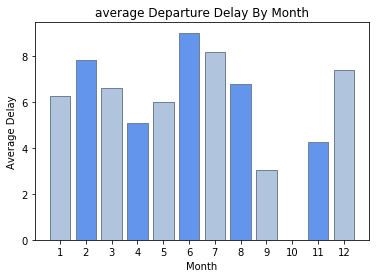

In [3]:
months = df.groupby('MONTH')['DEPARTURE_DELAY'].sum()
month_counts = df['MONTH'].value_counts()
month_delays_avg = months/month_counts


numbers = np.arange(1, 13, step=1)
color = ['lightsteelblue', 'cornflowerblue']

plt.bar(month_delays_avg.index, month_delays_avg, color=color, edgecolor = 'slategrey', )

plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.title('average Departure Delay By Month')
plt.xticks(numbers)

plt.savefig('figures/month_departure_delay')
plt.show()


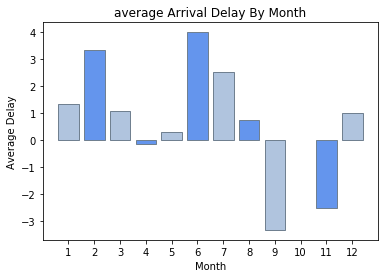

In [4]:
months = df.groupby('MONTH')['ARRIVAL_DELAY'].sum()
month_counts = df['MONTH'].value_counts()
month_delays_avg = months/month_counts

numbers = np.arange(1, 13, step=1)
color = ['lightsteelblue', 'cornflowerblue']

plt.bar(month_delays_avg.index, month_delays_avg, color=color, edgecolor = 'slategrey', )

plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.title('average Arrival Delay By Month')
plt.xticks(numbers)

plt.savefig('figures/month_arrival_delay')
plt.show()


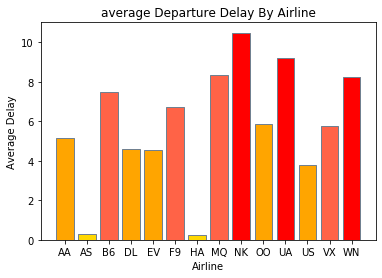

In [5]:
airline_delays = df.groupby('AIRLINE')['DEPARTURE_DELAY'].sum()
airline_counts = df['AIRLINE'].value_counts()
airline_delays_avg = airline_delays / airline_counts


color = ['orange','gold','tomato', 'orange', 'orange', 'tomato', 'gold', 'tomato', 'red', 'orange', 'red', 'orange', 'tomato', 'red']

plt.bar(airline_delays_avg.index, airline_delays_avg, color=color, edgecolor = 'slategrey')

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('average Departure Delay By Airline')

plt.savefig('figures/airline_departure_delay')
plt.show()



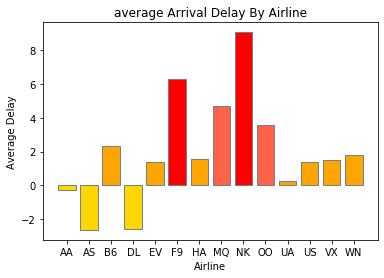

In [6]:
airline_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].sum()
airline_counts = df['AIRLINE'].value_counts()
airline_delays_avg = airline_delays / airline_counts


color = ['gold','gold','orange', 'gold', 'orange', 'red', 'orange', 'tomato', 'red', 'tomato', 'orange', 'orange', 'orange', 'orange']

plt.bar(airline_delays_avg.index, airline_delays_avg, color=color, edgecolor = 'slategrey')

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('average Arrival Delay By Airline')

plt.savefig('figures/airline_arrival_delay')
plt.show()



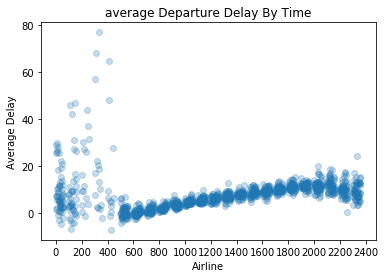

In [7]:
time = df.groupby('SCHEDULED_DEPARTURE')['DEPARTURE_DELAY'].sum()
time_counts = df['SCHEDULED_DEPARTURE'].value_counts()
time_delays_avg = time/time_counts


plt.scatter(time_delays_avg.index, time_delays_avg, alpha=.25)

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('average Departure Delay By Time')

plt.xticks(np.arange(0, 2600, step=200))

plt.savefig('figures/time_departure_delay.PNG')
plt.show()



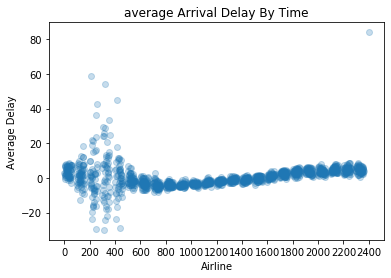

In [8]:
time = df.groupby('SCHEDULED_ARRIVAL')['ARRIVAL_DELAY'].sum()
time_counts = df['SCHEDULED_ARRIVAL'].value_counts()
time_delays_avg = time/time_counts


plt.scatter(time_delays_avg.index, time_delays_avg, alpha=.25)

plt.xlabel('Airline')
plt.ylabel('Average Delay')
plt.title('average Arrival Delay By Time')

plt.xticks(np.arange(0, 2600, step=200))

plt.savefig('figures/time_arrival_delay.PNG')
plt.show()



In [21]:
#X = df.drop(columns=['flight_number', 'tail_number', 'elapsed_time', 'air_time', 'wheels_on', 'taxi_in', 'arrival_time', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay', 'Unnamed: 0'])
X = df.drop(columns=['FLIGHT_NUMBER', 'TAIL_NUMBER', "ELAPSED_TIME", 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY', "Unnamed: 0"])

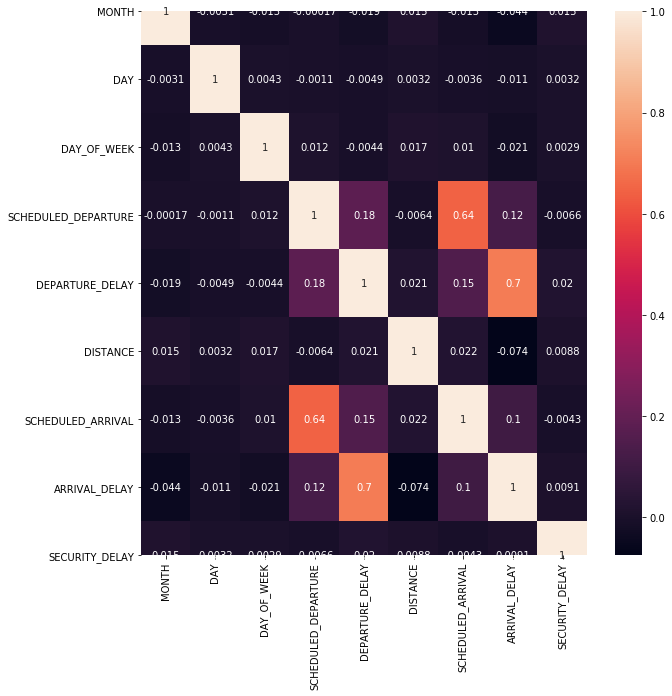

In [30]:
plt.figure(figsize=(10,10))
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.savefig('figures/correlation_matrix.PNG')
plt.show()